In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [2]:
data=pd.read_csv("Data/Womens Clothing E-Commerce Reviews.csv")

In [3]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
data=data.drop('Unnamed: 0',1)

In [5]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
data.shape

(23486, 10)

In [7]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

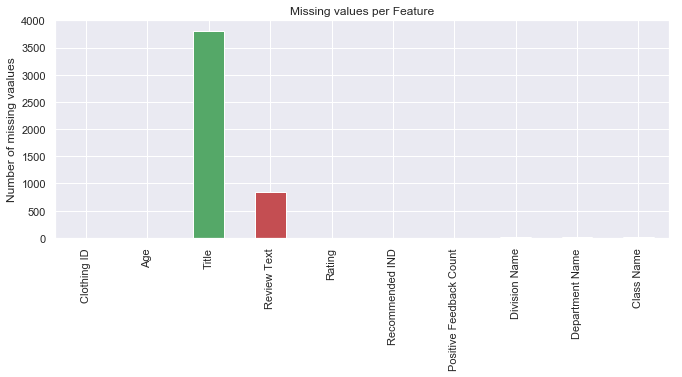

In [9]:
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(data).sum().plot(kind='bar')
plt.ylabel('Number of missing vaalues')
plt.title('Missing values per Feature')
plt.show()

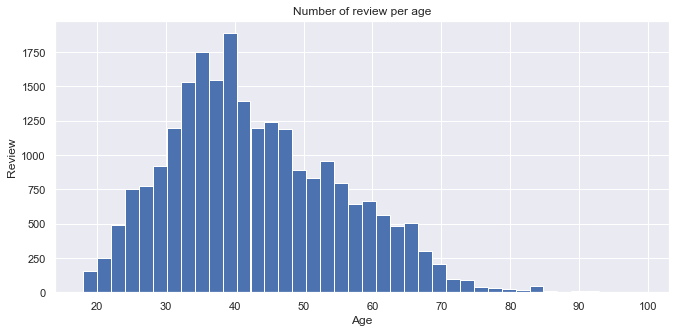

In [10]:
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(data['Age'],bins=40)
plt.xlabel("Age")
plt.ylabel("Review")
plt.title("Number of review per age")
plt.show()

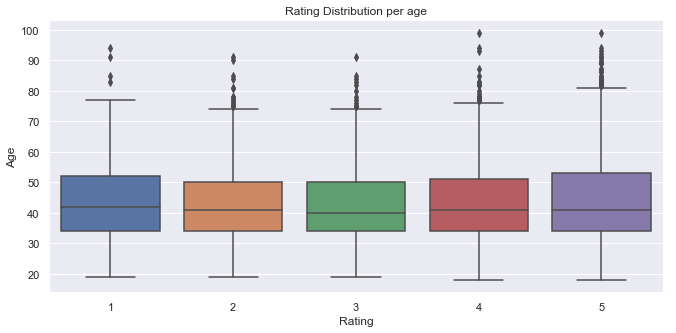

In [11]:
sns.boxplot(x='Rating',y='Age',data=data)
plt.title('Rating Distribution per age')
plt.show()

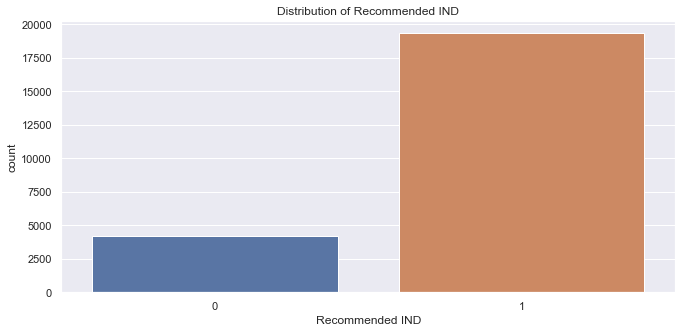

In [12]:
sns.countplot(x='Recommended IND',data=data)
plt.title('Distribution of Recommended IND')
plt.show()

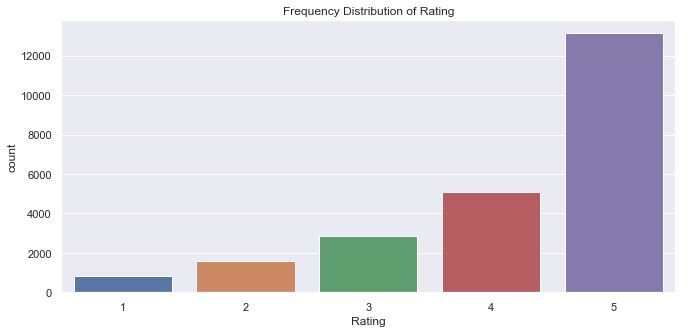

In [13]:
sns.countplot(x='Rating',data=data)
plt.title("Frequency Distribution of Rating")
plt.show()

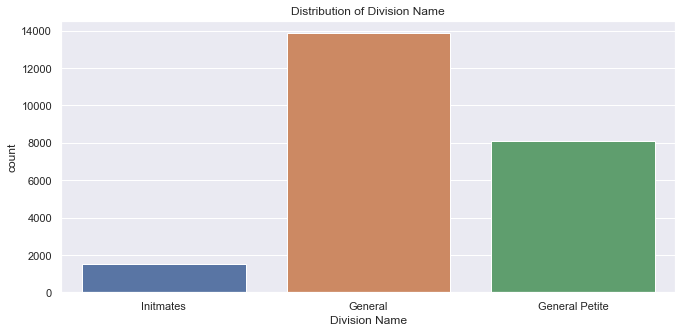

In [14]:
sns.countplot(x='Division Name',data=data)
plt.title("Distribution of Division Name")
plt.show()

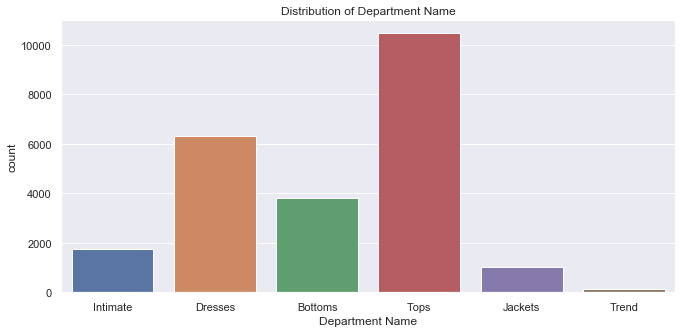

In [15]:
sns.countplot(x='Department Name',data=data)
plt.title("Distribution of Department Name")
plt.show()

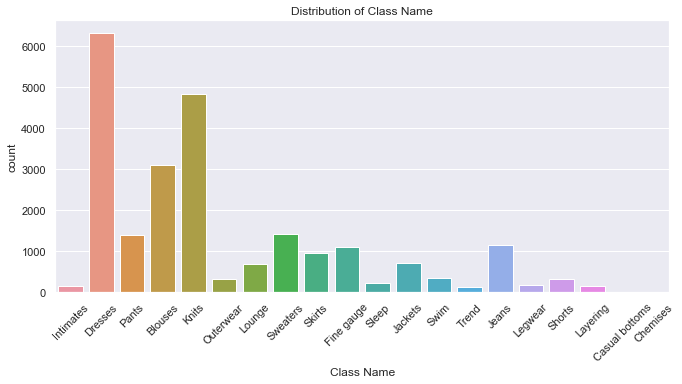

In [16]:
sns.countplot(x='Class Name',data=data)
plt.title("Distribution of Class Name")
plt.xticks(rotation=45)
plt.show()

In [17]:
recommended = data[data['Recommended IND']==1]
not_recommended = data[data['Recommended IND']==0]

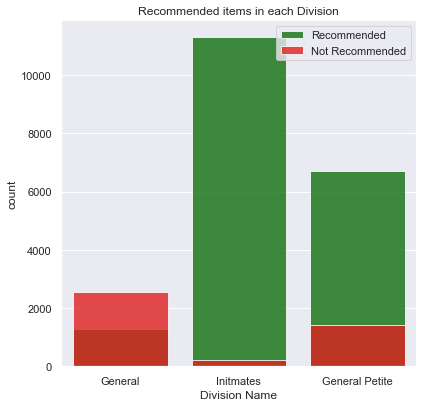

In [18]:
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot2grid((2,2),(0,0))
ax1 = sns.countplot(recommended['Division Name'],color="green",alpha=0.8,label="Recommended")
ax1 = sns.countplot(not_recommended['Division Name'],color="red",alpha=0.8,label="Not Recommended")
ax1 = plt.title("Recommended items in each Division")
ax1 = plt.legend()

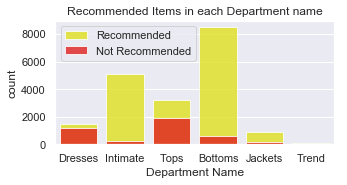

In [19]:
ax2 = plt.subplot2grid((2,2),(0,0))
ax2 = sns.countplot(recommended['Department Name'] , color="yellow",alpha=0.8,label="Recommended")
ax2 = sns.countplot(not_recommended['Department Name'] , color="red",alpha=0.8,label="Not Recommended")
ax2 = plt.title("Recommended Items in each Department name")
ax2 = plt.legend()

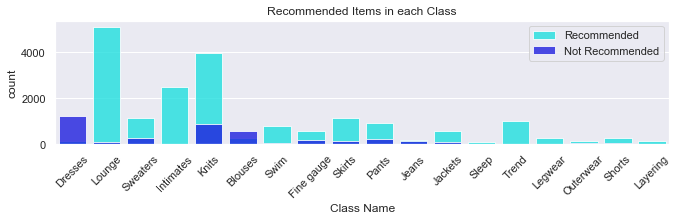

In [20]:
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(recommended['Class Name'], color="cyan", alpha = 0.8, label = "Recommended")
ax3 = sns.countplot(not_recommended['Class Name'], color="blue", alpha = 0.8, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()

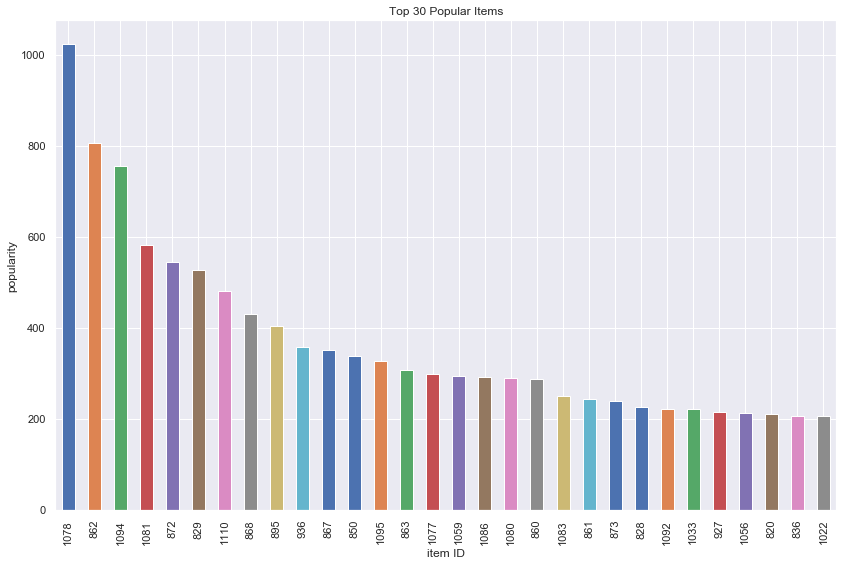

In [21]:
fig = plt.figure(figsize=(14, 9))
plt.xticks(rotation=45)
plt.xlabel('item ID')
plt.ylabel('popularity')
plt.title("Top 30 Popular Items")
data['Clothing ID'].value_counts()[:30].plot(kind='bar');
plt.show()

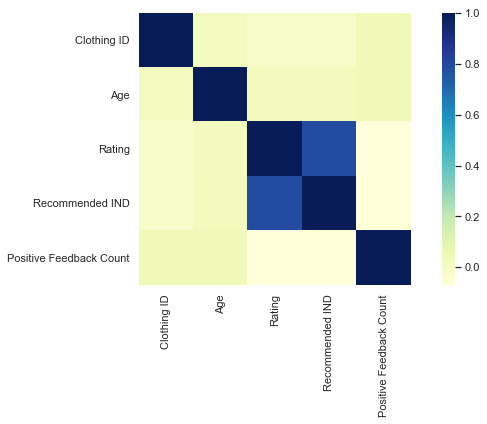

In [22]:
corrmat = data.corr()
sns.heatmap(corrmat,square=True, cmap="YlGnBu");
plt.show()

# Data Preprocess

In [23]:
data['Review Text'] = data['Review Text'].fillna('')

In [25]:
from wordcloud import WordCloud, STOPWORDS
from nltk import sent_tokenize, word_tokenize
import re

In [26]:
import nltk
nltk.download('wordnet')

def clean_and_tokenize(review):
    text = review.lower()
    
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    
    stemmer = nltk.stem.WordNetLemmatizer()
    text = " ".join(stemmer.lemmatize(token) for token in tokens)
    
    text = re.sub("[^a-z']"," ", text)
    
    return text
data["Clean_Review"] = data["Review Text"].apply(clean_and_tokenize)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
stopwords = stopwords.words('english')
from nltk.corpus import stopwords
words = re.compile(r"\w+",re.I)
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def clean_stop(data):
    clean_stop = []

    for q in data.Clean_Review.tolist():
        clean_stop.append([stemmer.stem(i.lower()) for i in words.findall(q) 
                                     if i not in stopwords])



    data["clean_stop"] = clean_stop   
    return data
data1=clean_stop(data)

In [29]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean_Review,clean_stop
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky and sexy and comf...,"[absolut, wonder, silki, sexi, comfort]"
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love this dress it 's sooo pretty i happene...,"[love, dress, sooo, pretti, happen, find, stor..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i had such high hope for this dress and really...,"[high, hope, dress, realli, want, work, initi,..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,i love love love this jumpsuit it 's fun ...,"[love, love, love, jumpsuit, fun, flirti, fabu..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...,"[shirt, flatter, due, adjust, front, tie, perf..."


In [30]:
data['final'] = data['clean_stop'].apply(lambda x: ','.join(map(str, x)))
data["final"] = data["final"].apply(clean_and_tokenize)
    

In [31]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean_Review,clean_stop,final
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky and sexy and comf...,"[absolut, wonder, silki, sexi, comfort]",absolut wonder silki sexi comfort
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love this dress it 's sooo pretty i happene...,"[love, dress, sooo, pretti, happen, find, stor...",love dress sooo pretti happen find ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i had such high hope for this dress and really...,"[high, hope, dress, realli, want, work, initi,...",high hope dress realli want work i...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,i love love love this jumpsuit it 's fun ...,"[love, love, love, jumpsuit, fun, flirti, fabu...",love love love jumpsuit fun flirti ...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...,"[shirt, flatter, due, adjust, front, tie, perf...",shirt flatter due adjust front tie ...


In [32]:

data['Sentiment'] = data['Rating'] >=4



data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean_Review,clean_stop,final,Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky and sexy and comf...,"[absolut, wonder, silki, sexi, comfort]",absolut wonder silki sexi comfort,True
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love this dress it 's sooo pretty i happene...,"[love, dress, sooo, pretti, happen, find, stor...",love dress sooo pretti happen find ...,True
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i had such high hope for this dress and really...,"[high, hope, dress, realli, want, work, initi,...",high hope dress realli want work i...,False
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,i love love love this jumpsuit it 's fun ...,"[love, love, love, jumpsuit, fun, flirti, fabu...",love love love jumpsuit fun flirti ...,True
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...,"[shirt, flatter, due, adjust, front, tie, perf...",shirt flatter due adjust front tie ...,True


In [33]:
data.shape

(23486, 14)

In [34]:
data.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean_Review,clean_stop,final,Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky and sexy and comf...,"[absolut, wonder, silki, sexi, comfort]",absolut wonder silki sexi comfort,True
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love this dress it 's sooo pretty i happene...,"[love, dress, sooo, pretti, happen, find, stor...",love dress sooo pretti happen find ...,True
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i had such high hope for this dress and really...,"[high, hope, dress, realli, want, work, initi,...",high hope dress realli want work i...,False
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,i love love love this jumpsuit it 's fun ...,"[love, love, love, jumpsuit, fun, flirti, fabu...",love love love jumpsuit fun flirti ...,True
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...,"[shirt, flatter, due, adjust, front, tie, perf...",shirt flatter due adjust front tie ...,True
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,i love tracy reese dress but this one is not...,"[love, traci, rees, dress, one, petit, foot, t...",love traci rees dress one petit fo...,False
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,i aded this in my basket at hte last mintue to...,"[ade, basket, hte, last, mintu, see, would, lo...",ade basket hte last mintu see woul...,True
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,i ordered this in carbon for store pick up a...,"[order, carbon, store, pick, ton, stuff, alway...",order carbon store pick ton stuff ...,True
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,i love this dress i usually get an x but it r...,"[love, dress, usual, get, x, run, littl, snug,...",love dress usual get x run littl ...,True
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,i 'm '' ' and lbs i ordered the s pet...,"[lb, order, petit, make, sure, length, wa, n, ...",lb order petit make sure length wa...,True


In [35]:
positive_reviews = data[data['Sentiment'] == True]
negative_reviews = data[data['Sentiment'] == False]

In [38]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

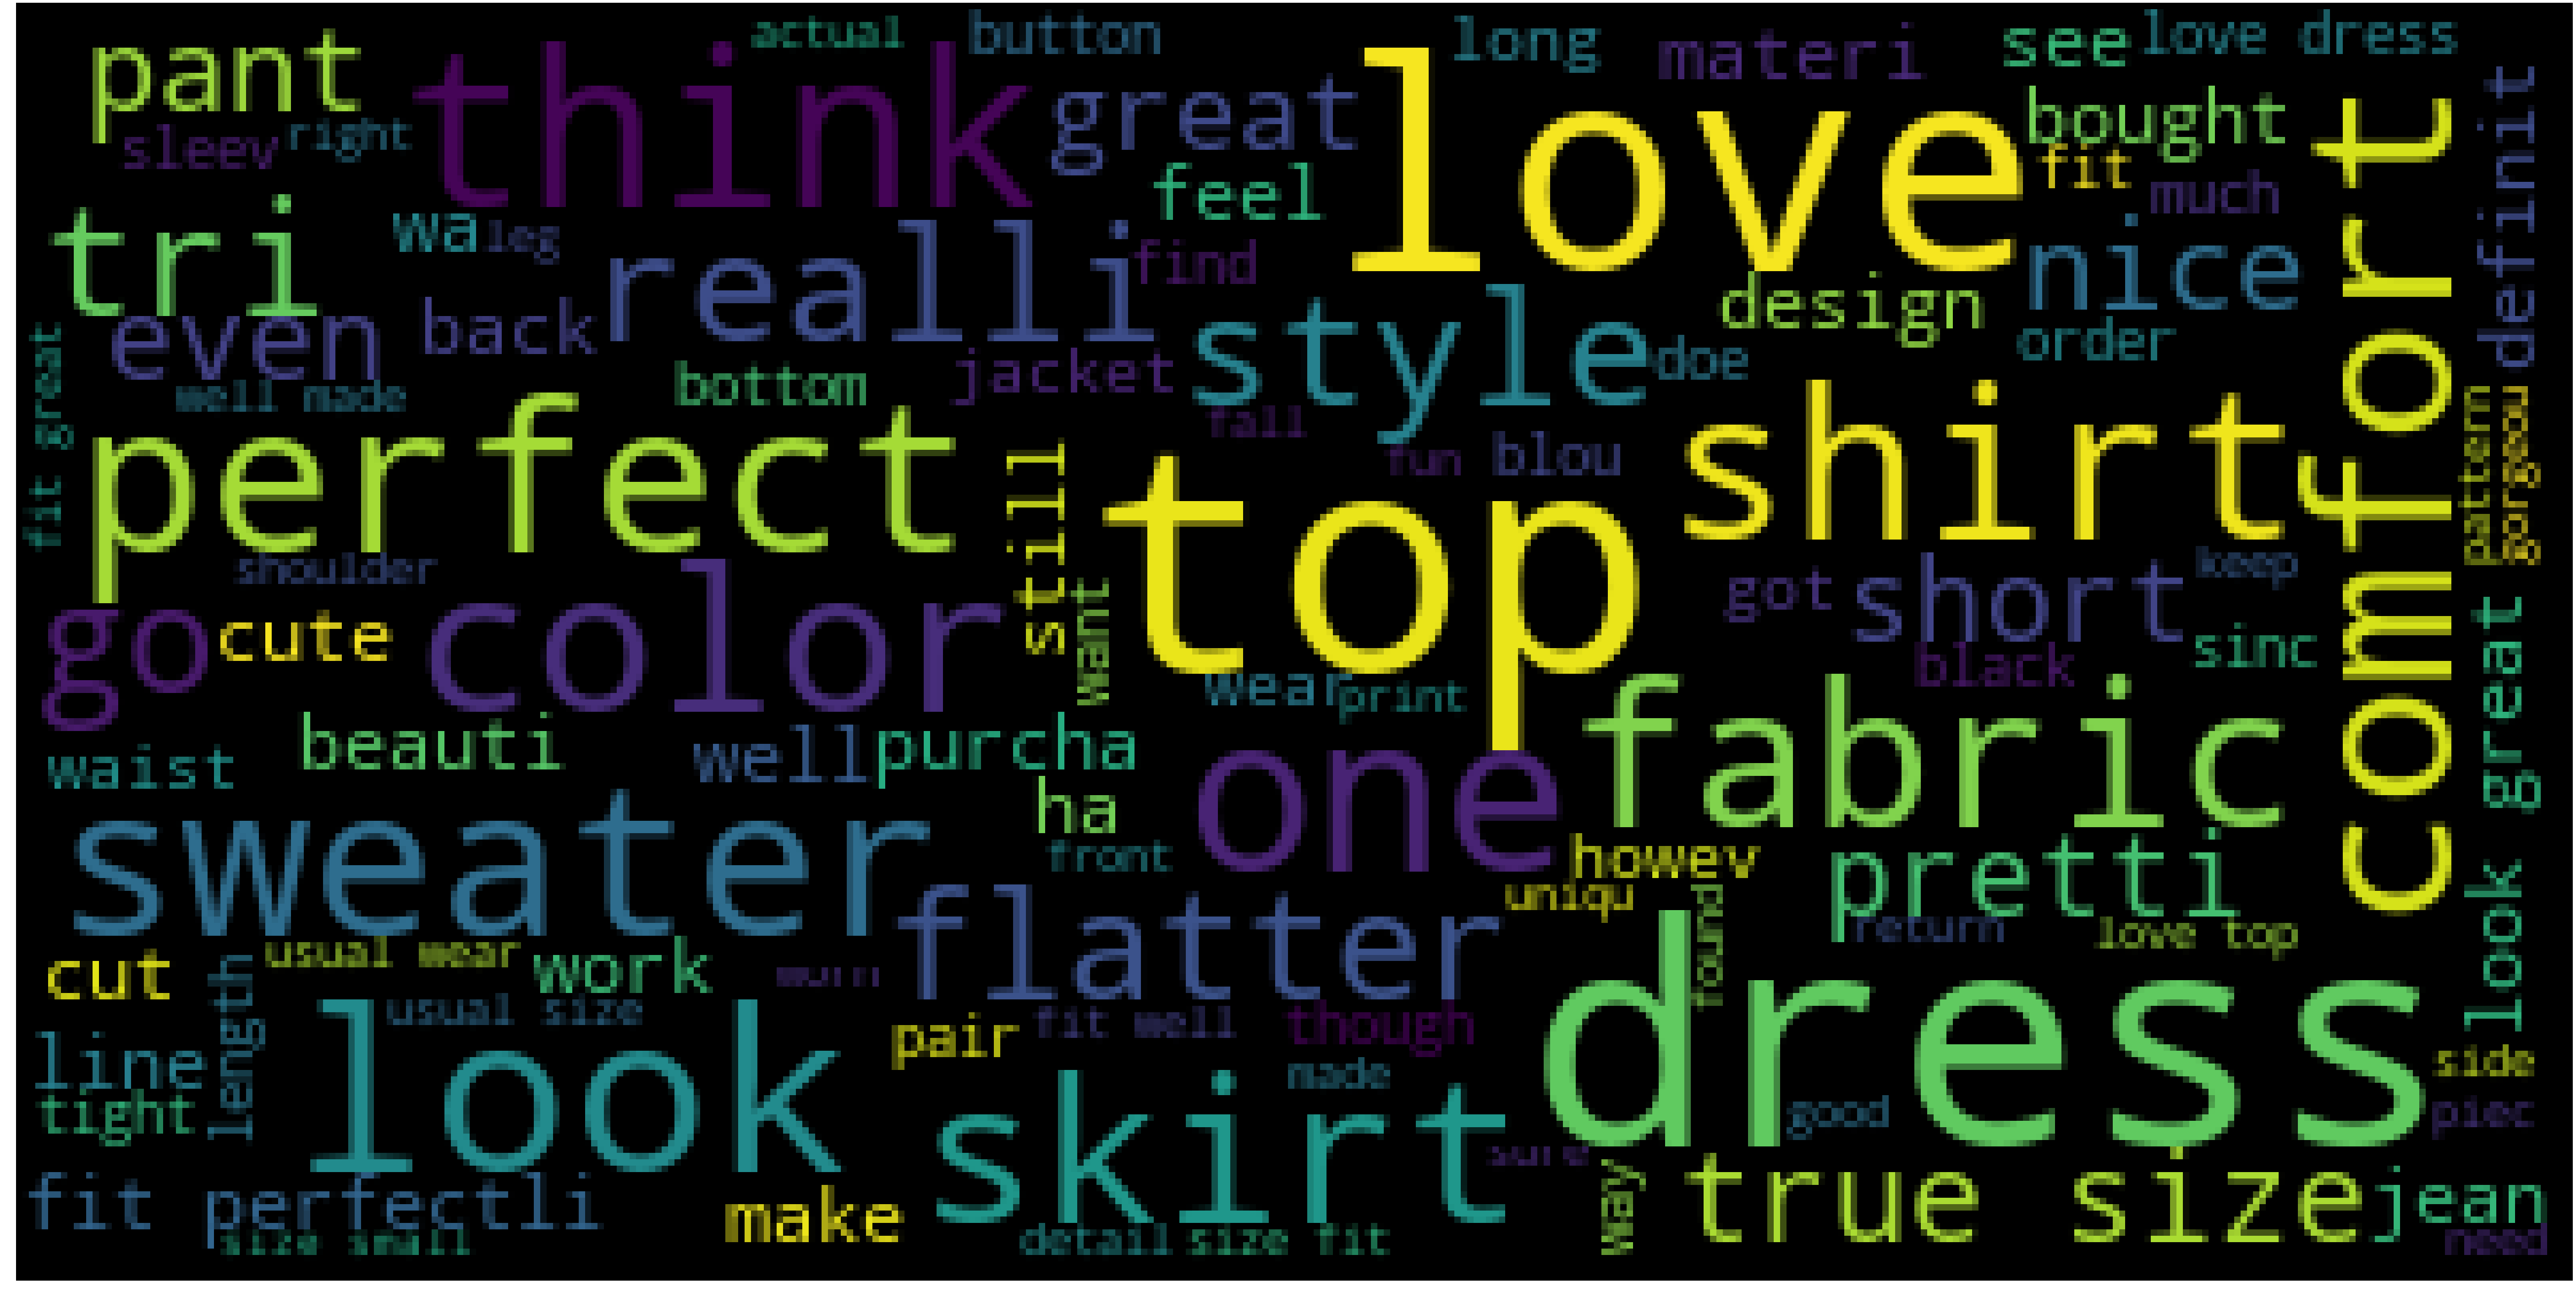

In [39]:
wc(positive_reviews['final'],'black','Most Used Words')

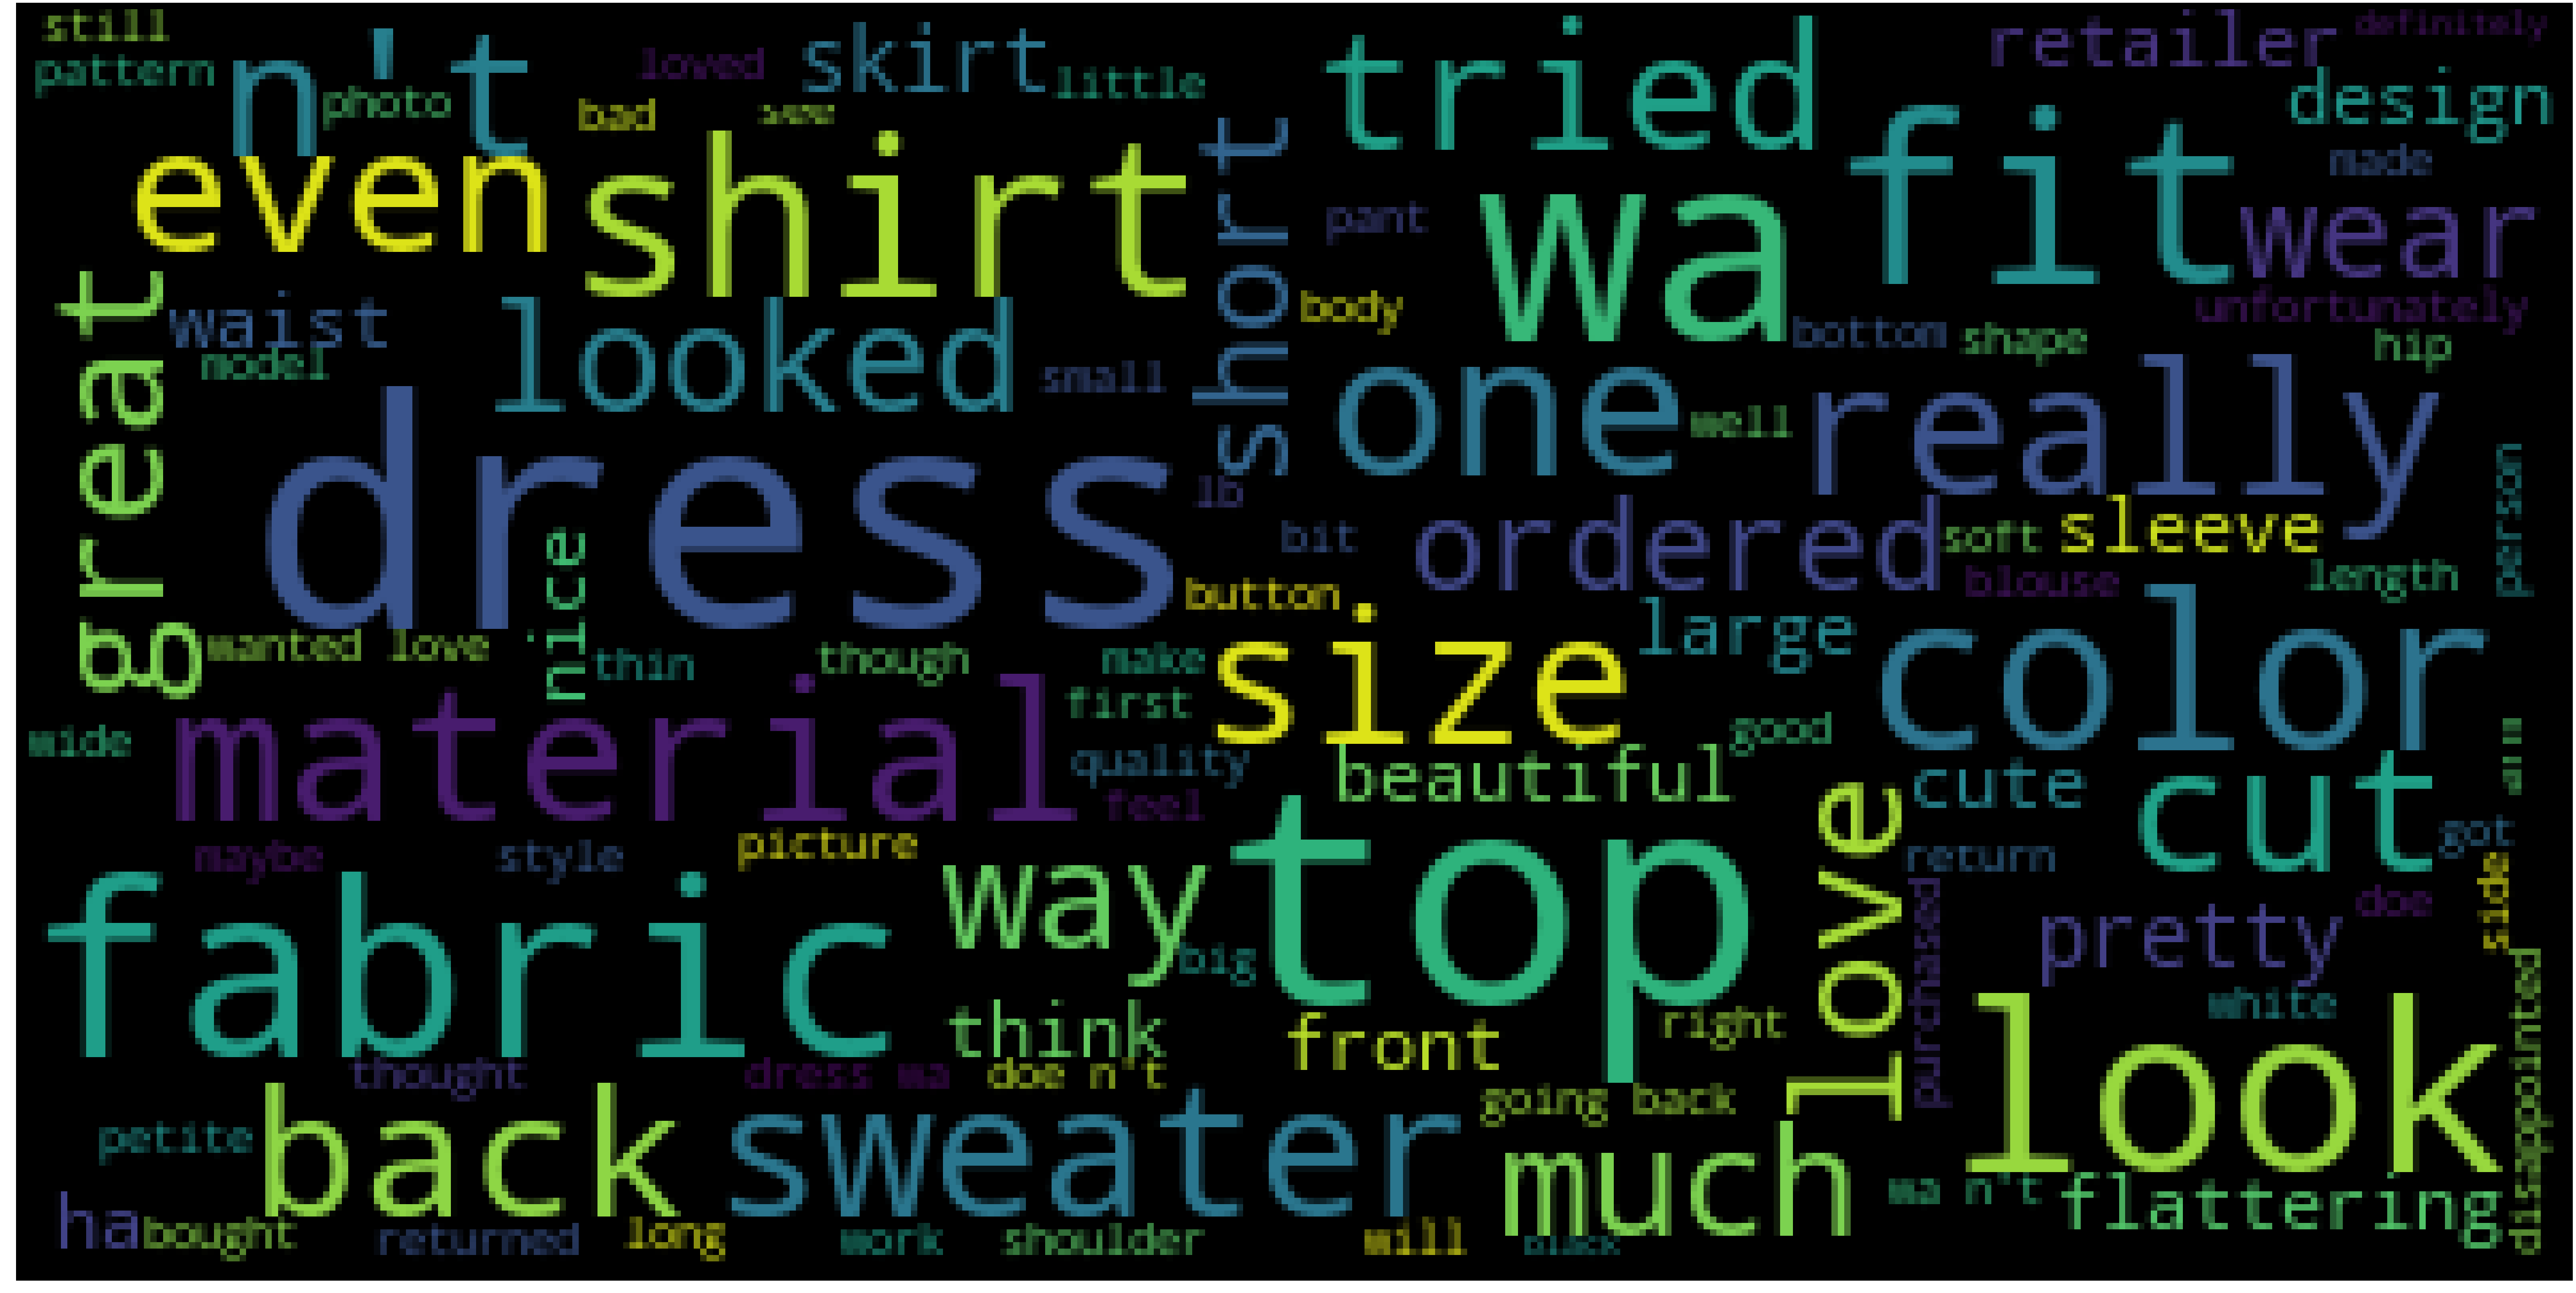

In [40]:
wc(negative_reviews['Clean_Review'],'black','Most Used Words')

# Predict Model


In [41]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['final'])
y = data['Recommended IND']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
y_train.value_counts()


1    15444
0     3344
Name: Recommended IND, dtype: int64

In [44]:
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.8220140515222483

In [45]:
y_test.value_counts()

1    3870
0     828
Name: Recommended IND, dtype: int64

In [46]:
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])*100

82.37547892720306

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\anand\Anaconda3\envs\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Train Data

In [48]:
y_pred = logreg.predict(X_train)

In [49]:
from sklearn import metrics
import numpy as np
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_train, y_pred), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_train, y_pred), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_train, y_pred), 2 ) )

Total Accuracy :  0.94
Precision :  0.95
Recall :  0.98


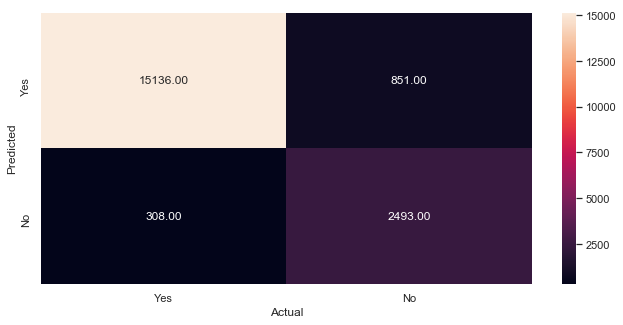

In [50]:
import seaborn as sn
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc,confusion_matrix
import matplotlib.pyplot as plt
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()
    
draw_cm(y_train,y_pred)

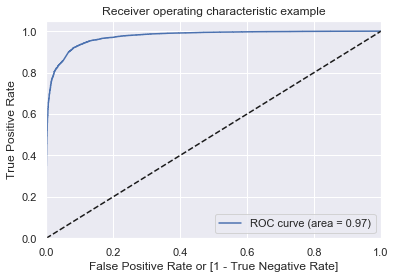

In [51]:
import matplotlib.pyplot as plt
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds
fpr, tpr, thresholds = draw_roc(y_train, logreg.predict_proba(X_train)[:,1])

# Test Data

In [52]:
y_pred_test = logreg.predict(X_test)

In [53]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_test, y_pred_test ), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_test, y_pred_test), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_test, y_pred_test), 2 ) )

Total Accuracy :  0.88
Precision :  0.91
Recall :  0.95


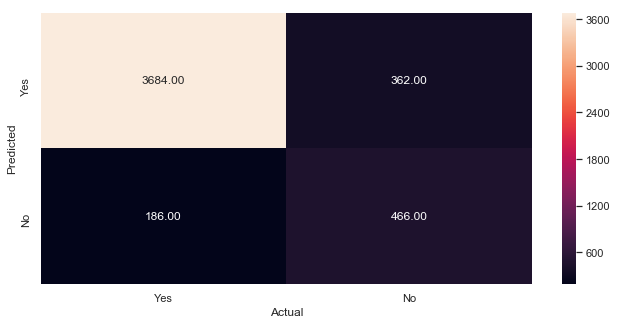

In [54]:
draw_cm(y_test, y_pred_test)

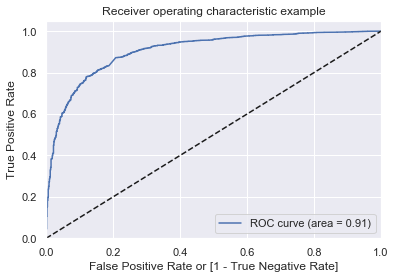

In [55]:
fpr, tpr, thresholds = draw_roc(y_test, logreg.predict_proba(X_test)[:,1])